# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Зачётные задачи для пересдающих.
### Дедлайн --- 20 декабря 2024

Это задание необходимо решить и устно ответить. Для получения положительной оценки необходимо набрать 70% баллов. Будьте готовы вспомнить простую теорию к задачам, определения и формулировки теорем. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

**До сдачи прака допускаются только студенты, не набравшие баллов на уд3 после результатов проверки практик 0-4. Этот прак нужно будет сдать устно на зачётной неделе преподавателю. В этом случае баллы за семестр игнорируются**

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [2]:
# Matplotlib needed to correctly display suptitles,
# as well as some other minor things.
# I thought I might as well ensure everything is up to date
%pip install --upgrade matplotlib numpy scipy statsmodels


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

In [5]:
np.random.seed(42)

**Условие задания**: После полугода лишений и страданий Великая Ордалия наконец добралась до врат Голготтерата и бросила вызов нечестивому консульту. Главное оружие в борьбе с чудовищами --- холодный точный рассчёт и идеальное планирование.

Вам, оставшимся выжившим после перехода через пустоши предстоит взять на себя роль тактиков Аспект-Императора, рассчитать все риски и придумать оптимальный план штурма.

Пусть Гнозис Вам благоволит и удачи!

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

## Задача 1. Статистики и оценки. (30 баллов)




**Как оценивается задача:** 10 баллов за нахождение и моделирование оценок информативными графиками, 10 баллов за подсчёт теоретических и эмпирических рисков и сравнение, 10 баллов за анализ состоятельности и асимптотической нормальности.

Для распределения Релэя https://en.wikipedia.org/wiki/Rayleigh_distribution с плотностью $p_{\sigma}(x) = \frac{x}{\sigma^2}exp(-\frac{x^2}{2\sigma^2}) I(x \geq 0)$ предложите следующие оценки параметра $\sigma$:

- Оценка методом моментов
- Оценка максимального правдоподобия
- Оценка медианой

Решение:

Распределение зависит только от параметра $\sigma$. Построим оценки спомощью выше указанных методов

#### 1.Оценка методом моментов:

$$E X_1 = \sigma \sqrt{\frac{\pi}{2}}$$
Поэтому наша несмещенная оценка равна: $$\overline{X} \sqrt{\frac{2}{\pi}} $$

#### 2.Оценка максимального правдоподобия: 

$$
L_{\sigma}(X) = \prod_{i=1}^{n} \frac{x_i}{\sigma^2} e^{-\frac{x_i^2}{2\sigma^2}}
$$

$$
L_{\sigma}(X) = \left(\frac{1}{\sigma^2}\right)^n \prod_{i=1}^n x_i \cdot e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n x_i^2}.
$$

$$
log L_{\sigma}(X) = -2n \ln \sigma + \sum_{i=1}^n \ln x_i - \frac{1}{2\sigma^2} \sum_{i=1}^n x_i^2.
$$

По итогу оценка получится: $$\hat{\sigma}^{2} = \frac{1}{2n} \sum_{i=1}^n x_i^2 $$

#### 3.Оценка медианой:

Медиана распределения равна $$M = \sigma \sqrt{2 ln2} $$

$$\sigma = \frac{M}{\sqrt{2 \ln 2}}$$

$$\hat{\sigma} = \frac{M_n}{\sqrt{2 \ln 2}} $$


Запишите формулу риска каждой оценки в виде интеграла и вычислите его аналитически или численно при помощи scipy.integrate.quad для размера выборки равного 10.

Риск для методов моментов:

$ R(\overline{X} \sqrt{\frac{2}{\pi}}) =$ (так как оценка не смещенная) $= D(\overline{X} \sqrt{\frac{2}{\pi}}) = \frac{4 - \pi}{n\pi}\sigma^2$

Риск для максимального правдоподобия:

$ R(\sqrt{\frac{1}{2n} \sum_{i=1}^n x_i^2}) =$ (так как оценка не смещенная) $= D(\sqrt{\frac{1}{2n} \sum_{i=1}^n x_i^2}) = \frac{\sigma^4}{n} $

Здесь использовалась формула для моментов $E\xi^{k} = (2\sigma^2)^{\frac{k}{2}} Г(\frac{k}{2} + 1) $

Риск для медианы:

воспользуемся теоремой о выборочной медиане:
$ \sqrt{n} (\hat{\mu} - z_{1/2}) \xrightarrow{d} N(0, \frac{1}{4f^2(z_{1/2})}) $

$ R(\frac{M_n}{\sqrt{2 \ln 2}}) \cong D(\frac{M_n}{\sqrt{2 \ln 2}}) = \frac{1}{2ln(2)} \frac{1}{4nf^2(z_{1/2})} =$ $(z_{1/2} = \sigma \sqrt{ln(4)})$ = $ \frac{\sigma^2}{4n ln^2(2)} $


в посчитанных интегралах будут такие значения для n = 10

метод моментов = $ \frac{4-\pi}{10\pi} \cong 0.027 $

максимальное правдоподобие = $ \frac{1}{10} \cong 0.1 $

медиана = $ \frac{1}{20 * ln(2)} \cong  0.051$

In [6]:
N = 1000
sigma = 1

def rayleigh_pdf(x):
    return (x / sigma**2) * np.exp(-x**2 / (2 * sigma**2)) if x >= 0 else 0

def moment_est(X):
    return np.mean(X, axis=-1) * np.sqrt(2/np.pi)

def likehood_est(X):
    return np.sqrt(np.mean(X**2, axis=-1) / 2)

def median_est(X):
    return np.median(X, axis=-1) / np.sqrt(2 * np.log(2))

как мы можем заметить - лучше всех себя показала оценка методом моментов.

Посчитайте эмпирический риск каждой оценки для размера выборки N = 100

In [7]:
sample = sps.rayleigh.rvs(scale = sigma, size = (N, 10))

moment_samp = moment_est(sample)
likehood_samp = likehood_est(sample)
median_samp = median_est(sample)

moment_risk = np.mean((moment_samp - sigma)**2)
likehood_risk = np.mean((likehood_samp - sigma)**2)
median_risk = np.mean((median_samp - sigma)**2)

print(f"Риск оценки методом моментов = {np.round(moment_risk, 6)}")
print(f"Риск оценки максимального правдоподобия = {np.round(likehood_risk, 6)}")
print(f"Риск оценки медианой = {np.round(median_risk, 6)}")


Риск оценки методом моментов = 0.024392
Риск оценки максимального правдоподобия = 0.022597
Риск оценки медианой = 0.040986


Промоделируйте каждую оценку для 100 выборок размера N = 100 и постройте эмпирическое распределение каждой оценки.

In [8]:
N = 1000

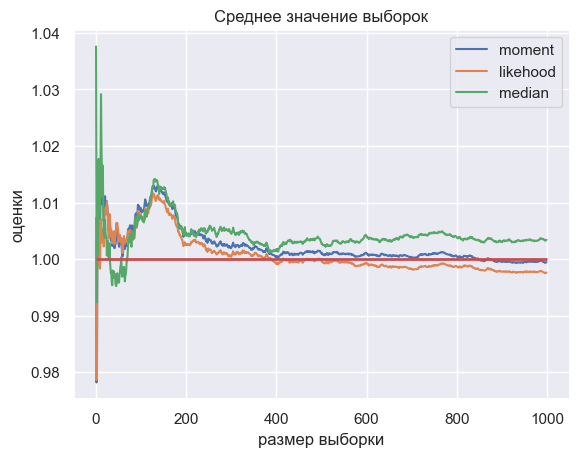

In [9]:
sample = sps.rayleigh.rvs(size = (N, 100))

cum_moment_samp = np.cumsum(moment_est(sample)) / np.arange(1, N + 1)
cum_likehood_samp = np.cumsum(likehood_est(sample)) / np.arange(1, N + 1)
cum_median_samp = np.cumsum(median_est(sample)) / np.arange(1, N + 1)

plt.plot(np.arange(0, N), cum_moment_samp, label = "moment")
plt.plot(np.arange(0, N), cum_likehood_samp, label = "likehood")
plt.plot(np.arange(0, N), cum_median_samp, label = "median")
plt.hlines(y=1, xmin=0, xmax=N, color="r", linewidth=2)
plt.title("Среднее значение выборок")
plt.xlabel("размер выборки")
plt.ylabel("оценки")
plt.legend()
plt.show()


на маленькой выборке это не слишком заметно, но оценка методом моментов и вправда хорошо оценивает параметр $\sigma$

Исходя из графиков, можно ли делать выводы о состоятельности и асимптотической нормальности оценок? Будут ли оценки состоятельными и асимптотически нормальными в теории? Сошлитесь на соответствующие теоремы и предложите теоретические выкладки ниже.

Ответ: я считаю что графики не предоставляют достаточно данных для иследования состоятельности и асимптотической состоятельности, но можно обратить внимание на своиства наших оценок:

#### Теорема 1
#### Если $m : \Theta \rightarrow m(\Theta)$ - биекция и $m^{-1}$ можно доопределить до функции, заданной на всем множестве $\R^{k}$ и непрерывной в каждой точке множества $m(\Theta) $ то оценка по методу моментов является cильно состоятельной

$m(\theta) = \theta \sqrt{\frac{2}{\pi}} $ удовлетворяет условиям теоремы, из за чего является ссильно состоятельной

#### Теорема 2
#### Функция правдоподобия имеет один локальный максимум совпадающий с оценкой,
#### Логарифм функции  правдоподобия трижды дифференцируем,
#### Cуществует не зависящая от параметра функция $M(x) $ такая что:
$$| \frac{d^3p(x)}{dx} | < M(X), EM(x) < \infty $$

#### Тогда оценка максимального правдаподобия - асимптотический нормальная с асимптотической дисперсией $n(D \frac{dL}{d\theta})^{-1}$

наша оценка также удовлетворяет условиям теоремы

#### Теорема 3
#### о асимптотической нормальности выборочной квантили:
#### Распределение абсолютно непрерывно, $z_p - p$ квантиль, плотность - непрерывно дифференцируема, положительна в $z_p $ 
#### $ \sqrt{n} (z_{np} - z_{p}) \xrightarrow{d} N(0, \frac{1}{4f^2(z_{p})})$

распределение абс. непр., плотность гладкая, в медиане принимает положитеьное значение - все сходится. наша оценка асимптотически нормальная

Сравните три оценки в равномерном и асимптотическом подходе. Сделайте вывод о качестве оценок.

**Вывод:**

## Задача 2. Моделирование (10 баллов)




Сформулируйте и запишите ниже Центральную Предельную теорему и Усиленный Закон Больших Чисел. Не забудьте про условия теорем!

Ответ:

### Центральная предельная теорема (ЦПТ):

Если $X_1, X_2, \dots, X_n$ — независимые одинаково распределенные случайные величины (н.о.р.с.в.) с конечными математическим ожиданием $\mu$ и дисперсией $\sigma^2$, то:

$$ \sqrt{n}(\overline{X} - \mu) \xrightarrow{d} N(0, \sigma^2) $$



### Усиленный закон больших чисел (УЗБЧ):

Если $X_1, X_2, \dots, X_n$ — независимые одинаково распределенные случайные величины (н.о.р.с.в.) с конечным математическим ожиданием $\mu$ то:

$$ \overline{X} \xrightarrow{п.н.} \mu $$


Численно проверьте верность теорем выше. Для доказательства того, что распределение является нормальным (в ЦПТ) используйте QQ-plot и гистограмму.

На 10 баллов необходимо показать, что теоремы верны, когда верны их условия и могут нарушаться для случайных величин, для которых условия теорем не верны. Приведите хотя бы по одному примеру величин, для которых ЦПТ и УЗБЧ не выполняются, покажите какие условия теоремы не верны и моделированием покажите, что теорема не выполняется.

сходимость $\xi_{n} \xrightarrow{п.н.} \xi$ эквивалентна $\forall \varepsilon > 0 \quad P(\sup_{k \geq n} |\xi_k - \xi| > \varepsilon ) \xrightarrow{n \to \infty} 0$

#### Применение УЗБЧ для стандартных нормальных с.в.

должны показать что $\frac{\xi_1 + \dots + \xi_n}{n} \xrightarrow{п.н.} E \xi = 0 $

In [10]:
n = 1000 
N = 1000
eps = 0.1
sample = sps.norm.rvs(loc=0, scale=1, size = (n, N))

In [11]:
cumsum_sample = (np.cumsum(sample, axis = 0).T / np.arange(1, n + 1)).T
cummax_sample = np.maximum.accumulate(cumsum_sample[::-1])[::-1]

In [12]:
P = np.sum(cummax_sample > eps, axis = 1) / N

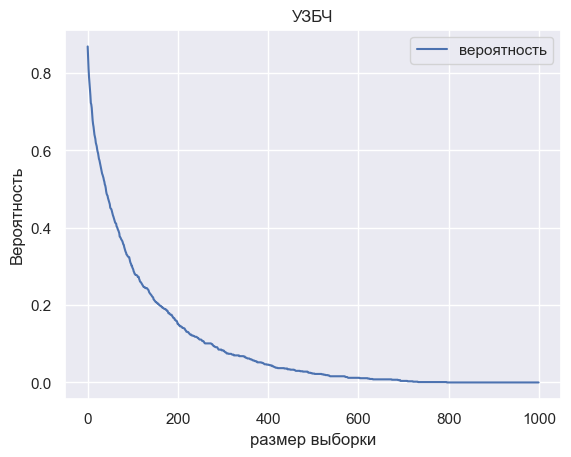

In [13]:
with sns.axes_style("darkgrid"):
    plt.plot(np.arange(0, n), P, label = "вероятность")
    plt.title("УЗБЧ")
    plt.xlabel("размер выборки")
    plt.ylabel("Вероятность")
    plt.legend()
    plt.show()

#### Применение ЦПТ для стандартных нормальных с.в.

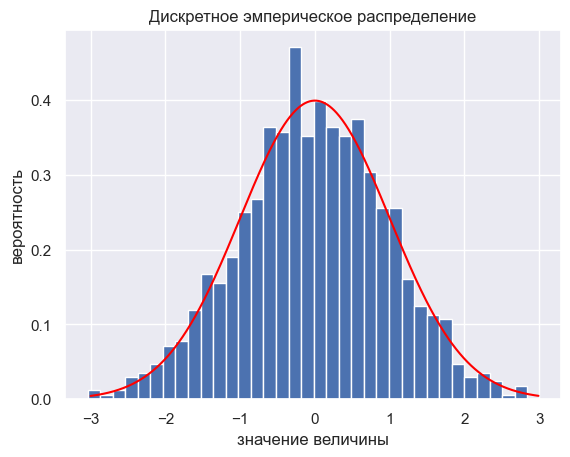

In [14]:
N = 1000 # sample size
mu = 0
sigma = 1
X = sps.norm.rvs(loc = mu, scale = sigma, size=(N, N))

P = np.sqrt(N)*(np.sum(X, axis=1)/N)
plt.title('Дискретное эмперическое распределение')
plt.hist(P.ravel(), bins=35, color = "b", density=True)
grid = np.arange(-3, 3, 0.01)
plt.plot(grid, sps.norm.pdf(grid, scale=1, loc=0), color = "red")
plt.xlabel("значение величины")
plt.ylabel("вероятность")

plt.show()

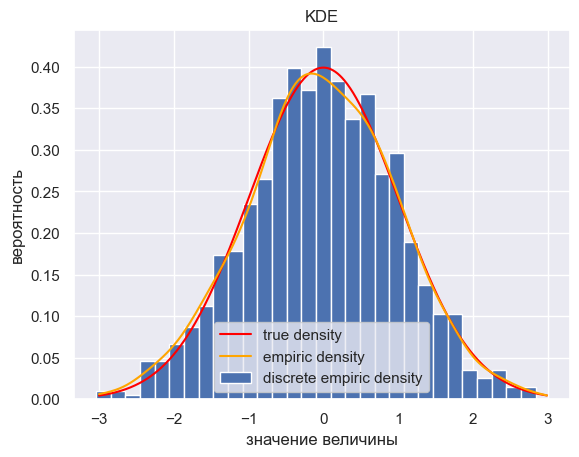

In [15]:
plt.title('KDE')
kernel = sps.gaussian_kde(P)
grid = np.arange(-3, 3, 1e-2)
plt.plot(grid, sps.norm.pdf(grid, scale=sigma, loc=0), label='true density', color = "red")
plt.plot(grid, kernel(grid), label='empiric density', color = "orange")
plt.hist(P.ravel(), bins=30, color = "b", density=True, label='discrete empiric density')
plt.xlabel("значение величины")
plt.ylabel("вероятность")
plt.legend()
plt.show()

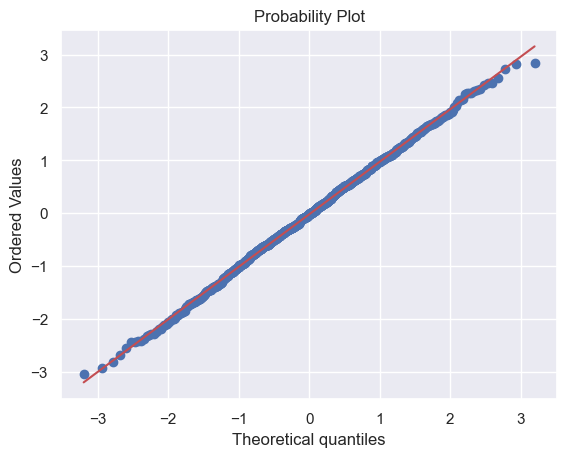

In [16]:
sps.probplot(P, dist=sps.norm(loc=0, scale=1), plot=plt)
plt.show()

по QQ-plot видно что в целом выборка ведет себя почти так же как стандартное нормальное распределение, видны только мелкие погрещности на концах графика

Покажем что для Распределения Коши не выполняется даже ЗБЧ (сходимость по вероятности) так как у него нету матожидания

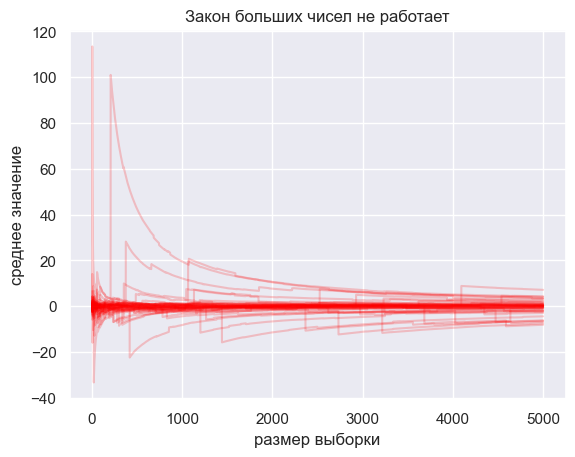

In [17]:
N = 5000
mu = 0.3
X = sps.cauchy.rvs(size = (50, N))

P = np.cumsum(X, axis=1)/np.arange(1, N+1)
plt.xlabel('размер выборки')
plt.ylabel('среднее значение')
plt.title('Закон больших чисел не работает')
plt.plot(np.arange(1, N+1), P.T, color='red', alpha=0.2)
plt.show()

Также ЦПТ не выполняется для распределения Парето

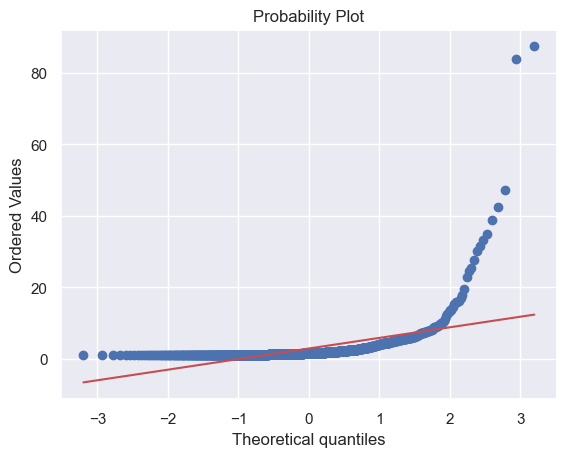

In [18]:
alpha = 1.5
sps.probplot(sps.pareto.rvs(alpha, size=1000), dist=sps.norm(loc=0, scale=1), plot=plt)
plt.show()

левый хвост находится выше линейной части что свидетельствует об легком хвосте распределения слева, а справа наоборот, хвост слишком тяжелый

## Задача 3. Метод моментов (10 баллов)


Постройте оценку методом моментов для следующих распределений: Beta($\alpha, \beta$), Poiss($\lambda$), Bin(n, p) --- бета распределения, распределения Пуассона и биномиального распределения.

Решение:

- Для Пуассона:  
Пусть $X_i \sim \text{Poiss}(\lambda)$. Тогда $E X = \lambda$. Оценка методом моментов: $\hat{\lambda} = \overline{X}$.

- Для биномиального $\text{Bin}(n, p)$:  
$E X = np$, $E X^2 = np(1-p) + n^2p^2$. Оценка методом моментов:
$\hat{n} = \frac{\overline{X}^2}{\overline{X} + \overline{X}^2 - \overline{X^2}}, \quad$
$\hat{p} = \frac{\overline{X}}{\hat{n}}$


- Для бета-распределения $\text{Beta}(\alpha, \beta)$:  
$E X = \frac{\alpha}{\alpha+\beta}$, $E X^2 = \frac{\alpha(\alpha + 1)}{(\alpha+\beta)(\alpha+\beta+1)}.$ 

$ \hat{\alpha} = \frac{\overline{X}^2 - \overline{X^2} \overline{X}}{\overline{X^2} - \overline{X}^2}, \quad $
$ \hat{\beta} = \frac{\hat{\alpha} (1 - \overline{X})}{\overline{X}}.$

Постройте график сходимости оценок (по одной выборке). Проанализируйте его скорость сходимости.

Bin(n, p)

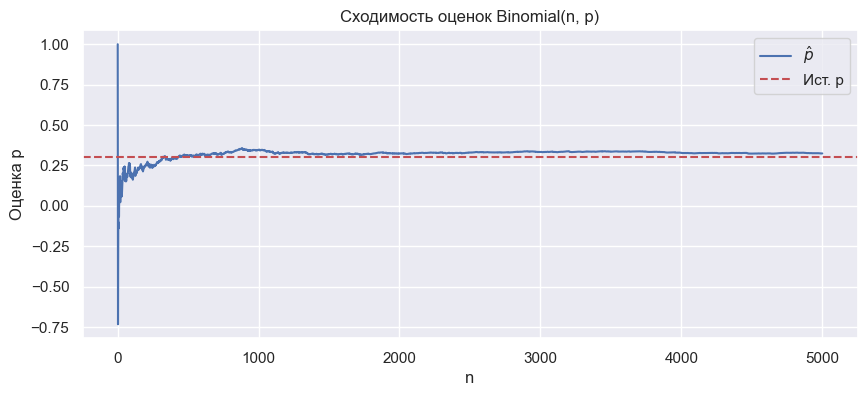

In [19]:
N=5000
n_true = 10
p_true = 0.3
X_binom = sps.binom.rvs(n_true, p_true, size=N)
grid = np.arange(1, N+1, 1)

means_binom = np.cumsum(X_binom) / grid
means_square_binom = np.cumsum(X_binom**2) / grid

n_est = means_binom**2 / (means_binom + means_binom**2 - means_square_binom)
p_est = means_binom/n_est

plt.figure(figsize=(10,4))
plt.plot(grid, p_est, label=r'$\hat{p}$')
plt.axhline(y=p_true, color='r', linestyle='--', label='Ист. p')
plt.title("Сходимость оценок Binomial(n, p)")
plt.xlabel("n")
plt.ylabel("Оценка p")
plt.legend()
plt.grid(True)
plt.show()

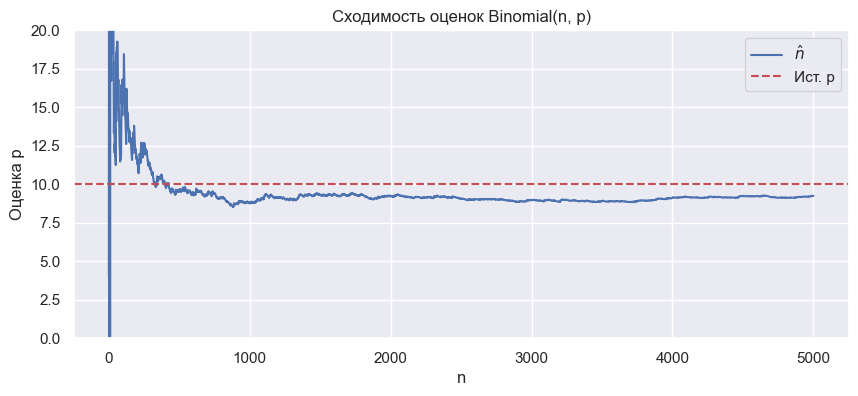

In [20]:
plt.figure(figsize=(10,4))
plt.plot(grid, n_est, label=r'$\hat{n}$')
plt.axhline(y=n_true, color='r', linestyle='--', label='Ист. p')
plt.title("Сходимость оценок Binomial(n, p)")
plt.xlabel("n")
plt.ylabel("Оценка p")
plt.ylim(0, 20)
plt.legend()
plt.grid(True)
plt.show()

$Poiss(\lambda)$

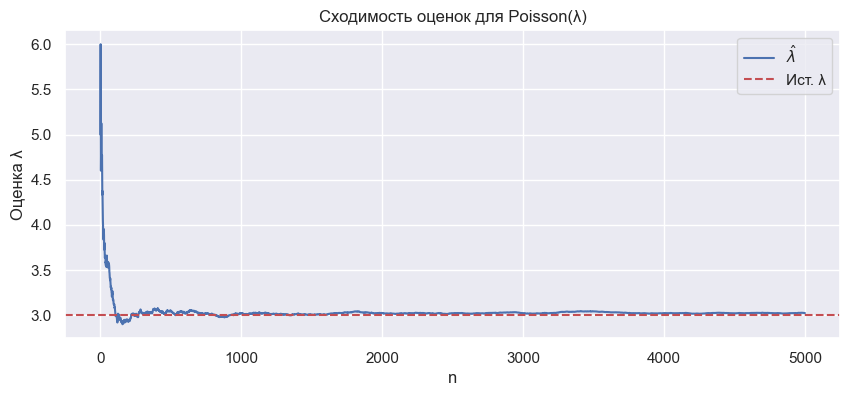

In [21]:
lambda_true = 3.0
X_pois = sps.poisson.rvs(lambda_true, size=N)
means_pois = np.cumsum(X_pois) / grid
lambda_est = means_pois

plt.figure(figsize=(10,4))
plt.plot(grid, lambda_est, label=r'$\hat{\lambda}$')
plt.axhline(y=lambda_true, color='r', linestyle='--', label='Ист. λ')
plt.title("Сходимость оценок для Poisson(λ)")
plt.xlabel("n")
plt.ylabel("Оценка λ")
plt.legend()
plt.grid(True)
plt.show()

$B(\alpha, \beta)$

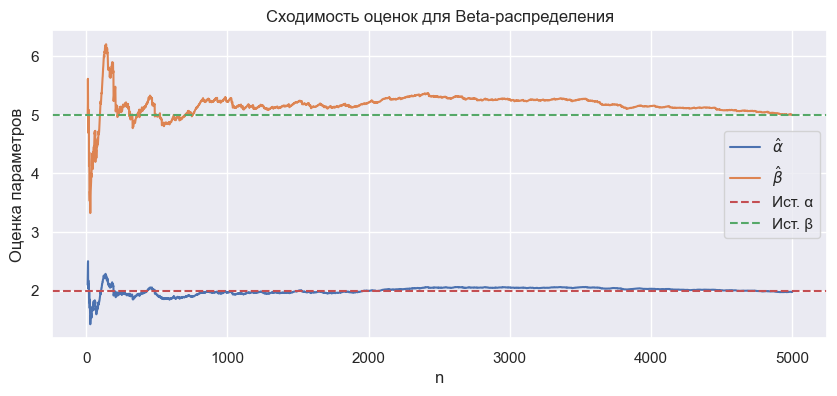

In [22]:
alpha_true = 2.0
beta_true = 5.0
X_beta = sps.beta.rvs(alpha_true, beta_true, size=N)
grid = np.arange(10, N+1, 1)

cum_X = np.cumsum(X_beta)
cum_X2 = np.cumsum(X_beta**2)

m1 = cum_X[grid-1] / grid
m2 = cum_X2[grid-1] / grid

alpha_est = (m1**2 - m1*m2) / (m2 - m1**2 + 1e-15)
beta_est = alpha_est * (1 - m1) / m1

valid = (alpha_est > 0) & (beta_est > 0)
alpha_est[~valid] = np.nan
beta_est[~valid] = np.nan

plt.figure(figsize=(10,4))
plt.plot(grid, alpha_est, label=r'$\hat{\alpha}$')
plt.plot(grid, beta_est, label=r'$\hat{\beta}$')
plt.axhline(y=alpha_true, color='r', linestyle='--', label='Ист. α')
plt.axhline(y=beta_true, color='g', linestyle='--', label='Ист. β')
plt.title("Сходимость оценок для Beta-распределения")
plt.xlabel("n")
plt.ylabel("Оценка параметров")
plt.legend()
plt.grid(True)
plt.show()

Будут ли оценки состоятельными? Напишите соответствующую теорию.

Если $m : \Theta \to m(\Theta)$ — биекция и функцию $m^{-1}$ можно доопределить до функции, заданной на всём множестве $\mathbb{R}^k$ и непрерывной в каждой точке множества $m(\Theta)$, то оценка по методу моментов является сильно состоятельной.

у всех наших оценок функция $m$ удовлетворяет условиям. Значит наши оценки (сильно) состоятельны

Обоснуйте теоретически, какие скорости сходимости оценок следовало ожидать в этой задаче.

теорему выше можно улучшить, потребуя конечность дисперсии и дифференцируемость $m^{-1}$ во всем образе $m$, в следствии чего наша оценка становится асимптотический нормальной и будет иметь $\mathcal{O}(1/\sqrt{N})$ скорость сходимости

Сделайте вывод.

**Вывод:**

Мы построили оценки параметров для Beta(α, β), Poisson(λ) и Bin(n, p) распределений методом моментов. На графиках видно что оценки сходятся к истинным параметрам с увеличением выборки. Таким образом, оценки методом моментов являются состоятельными. Их скорость сходимости будет $\mathcal{O}(1/\sqrt{N})$ на основе центральной предельной теоремы. 

## Задача 4. Байесовские оценки (10 баллов)


Для распределения Пуассона и экспоненциального распределения постройте сопряжённое семейство распределений и выведите, как изменяются его параметры после вариационного байесовского вывода (после применения теоремы Байеса):

Просим решить задачу для одного распределения, и только затем для второго, чтобы упростить проверку. Не стройте в одной ячейке объекты, относящиеся к разным распределениям!

Решение: в обоих случаях за апостериорное распределение возьмем $Г(\alpha, \beta)$

для распределения Пуассона:
$$p_{\theta|X}(t|x) =
\frac{q(t)p_t(x)}{\int_{\Theta} q(u)p_u(x)du} =
C t^{\alpha - 1} e^{-\beta t} t^{\sum X_i} e^{-nt}=
C t^{\alpha + \sum X_i - 1} e^{-(\beta + n)t} $$ 

это плотность $\Gamma(\alpha + \sum X_i, \beta + n) $

Cоответственно матожидание (она же Байесовская оценка) будет равно $ (\alpha + \sum X_i)(\beta+ n) $

для экспоненциального распределения:

$$p_{\theta|X}(t|x) =
\frac{q(t)p_t(x)}{\int_{\Theta} q(u)p_u(x)du} =
C t^{\alpha - 1} e^{-\beta t} t^{n} e^{-\sum X_i t}=
C t^{\alpha + n - 1} e^{-(\beta + \sum X_i)t} $$ 

это плотность $\Gamma(\alpha + n, \beta + \sum X_i) $

Постройте апостериорные плотности для разных выборов априорных параметров (для обоих распределений):

Пуассон

In [23]:
def Poiss_apost_pdf(alpha, beta, sample):
    sum_x = np.sum(sample)
    n = len(sample)
    alpha_post = alpha + sum_x
    beta_post = beta + n
    def posterior_pdf(x):
        return sps.gamma.pdf(x, a=alpha_post, scale=1.0/beta_post)
    
    return posterior_pdf

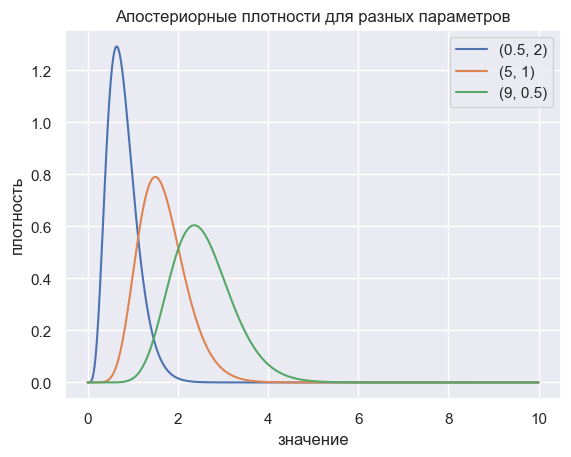

In [24]:
lamb_parametr = 1
parametrs = [(0.5, 2), (5, 1), (9, 0.5)]
sample = sps.poisson.rvs(mu = lamb_parametr, size = 5)
destributions = [Poiss_apost_pdf(alpha, beta, sample) for alpha, beta in parametrs]

grid = np.linspace(0, 10, 1000)
for dest, param in zip(destributions, parametrs):
    plt.plot(grid, dest(grid), label = f"{param}")
plt.title('Апостериорные плотности для разных параметров')
plt.xlabel("значение")
plt.ylabel("плотность")
plt.legend()
plt.show()

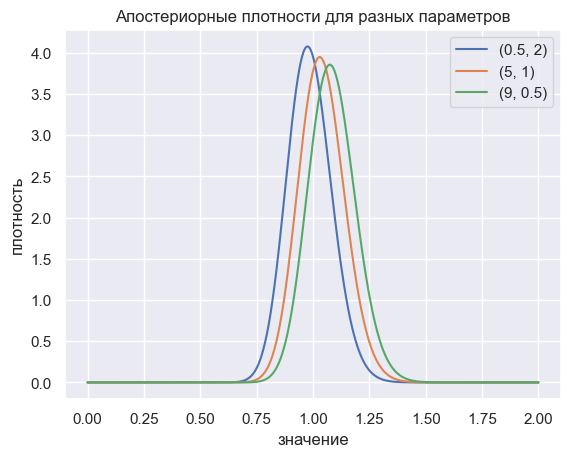

In [25]:
sample = sps.poisson.rvs(mu = lamb_parametr, size = 100)
destributions = [Poiss_apost_pdf(alpha, beta, sample) for alpha, beta in parametrs]

grid = np.linspace(0, 2, 1000)
for dest, param in zip(destributions, parametrs):
    plt.plot(grid, dest(grid), label = f"{param}")
plt.title('Апостериорные плотности для разных параметров')
plt.xlabel("значение")
plt.ylabel("плотность")
plt.legend()
plt.show()

Экспоненициальное распределение

In [26]:
def Expon_apost_pdf(alpha, beta, sample):
    sum_x = np.sum(sample)
    n = len(sample)
    alpha_post = alpha + n
    beta_post = beta + sum_x
    def posterior_pdf(x):
        return sps.gamma.pdf(x, a=alpha_post, scale=1.0/beta_post)
    
    return posterior_pdf

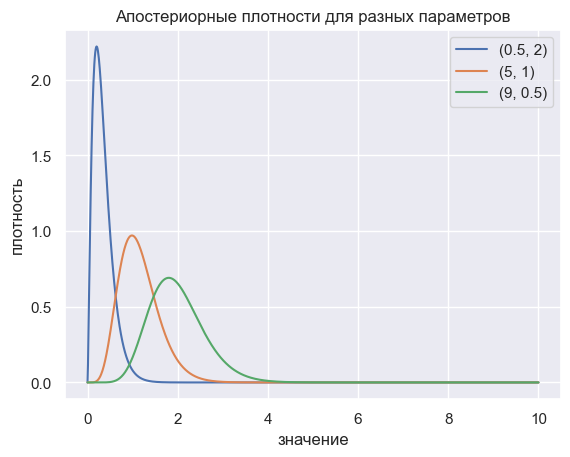

In [27]:
lamb_parametr = 1
parametrs = [(0.5, 2), (5, 1), (9, 0.5)]
sample = sps.expon.rvs(loc = 0, scale = 1/lamb_parametr, size = 5)
destributions = [Poiss_apost_pdf(alpha, beta, sample) for alpha, beta in parametrs]

grid = np.linspace(0, 10, 1000)
for dest, param in zip(destributions, parametrs):
    plt.plot(grid, dest(grid), label = f"{param}")
plt.title('Апостериорные плотности для разных параметров')
plt.xlabel("значение")
plt.ylabel("плотность")
plt.legend()
plt.show()

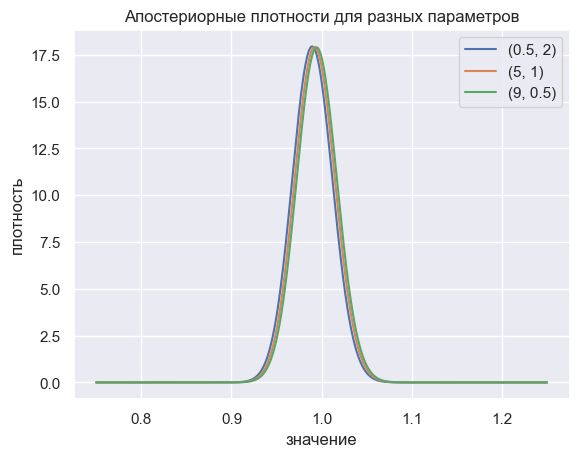

In [28]:
sample = sps.expon.rvs(loc = 0, scale = 1/lamb_parametr, size = 2000)
destributions = [Poiss_apost_pdf(alpha, beta, sample) for alpha, beta in parametrs]

grid = np.linspace(0.75, 1.25, 1000)
for dest, param in zip(destributions, parametrs):
    plt.plot(grid, dest(grid), label = f"{param}")
plt.title('Апостериорные плотности для разных параметров')
plt.xlabel("значение")
plt.ylabel("плотность")
plt.legend()
plt.show()

Сделайте вывод о том, как выбор априорных параметров влияет на апостериорную плотность и как его следует подбирать на практике.

**Вывод:**

Параметры подбирал из примеров по Википедии, в любом случае при возрастании выборки - начинали вести себя похожим образом (влотность концентрировалась около значения параметра - 1) - я пришел к выводу что параметры в данном случае играют не главную роль, можно подобрать вполне себе обычные. Все дело в априорном распределении - после применения теоремы Байеса априорная и апостериорная распределения должны остаться в в том же семействе, из за чего становится легче отслеживать изменение оценки

## Задача 5. Доверительное оценивание. (10 баллов)


Для распределения Лапласа с плотностью $p_{a}(x) = \frac{1}{4}exp(-\frac{|x - a|}{2})$ постройте точный и асимптотический доверительные интервалы. Второй нужно строить на основании ЦПТ.

Ответ:

1. Точный ДИ:

Пусть уровень доверия нашего ДИ будет равен $ \gamma $

Для параметра сдвига Лапласа состоятельной и несмещенной оценкой является выборочная медиана $\hat{a} = \text{median}(X)$

Для уровня доверия $/gamma$, можно использовать биномиальную аргументацию: Число членов выборки $K$ оказавшиеся меньше медианы распределено как $ Bin(n, 1/2) $ так как вероятность каждого элемента быть меньше медианы равна 1/2. Найдем такое $k$ что

$P(K < k) \ge (1 - \gamma)/2 $

тогда доверительный интервал уровня $ \gamma $ будет $ [X_k, X_{n-k}] $

2. Ассимптотический ДИ:

Медиана для большого объёма выборки асимптотически нормально распределена с дисперсией $D(\hat{a}) = \frac{1}{4 n [f(a)]^2}$, где $f(a)$ — плотность в точке медианы.

Для нашего Лапласа $f(a) = \frac{1}{4}$. Тогда:

$$ \sqrt{n} (\hat{a} - a) \xrightarrow{d} N(0, 4) $$
$$ \frac{\sqrt{n}}{2} (\hat{a} - a) \xrightarrow{d} N(0, 1) $$


Следовательно, ДИ уровня $\gamma$ по ЦПТ (теорема о выборочной медиане):

$$[\hat{a} - z_{\frac{1+\gamma}{2}} \frac{2}{\sqrt{n}}, \hat{a} - z_{\frac{1-\gamma}{2}} \frac{2}{\sqrt{n}}]$$

$ z_{\frac{1\pm\gamma}{2}} $ - квантили Стандартного нормального распределения


Напишите функции вычисления точного, асимптотического и бутстрепного интервала.

In [29]:
a_true = 0
b = 2
N = 1000
n = 100

In [30]:
def exact_ci(sample, gamma=0.95):
    n = len(sample)
    sample_sorted = np.sort(sample)
    k = sps.binom.ppf((1-gamma) / 2, n, 1/2)
        
    low = sample_sorted[int(k)-1]
    high = sample_sorted[n-int(k)-1]
    return low, high

def asymptotic_ci(sample, gamma=0.95):
    n = len(sample)
    median_est = np.median(sample)
    z1 = sps.norm.ppf((1-gamma) / 2)
    z2 = sps.norm.ppf((1+gamma) / 2)

    left = median_est - z2 / np.sqrt(n)
    right = median_est - z1 / np.sqrt(n)
    return left, right

def bootstrap_ci(sample, gamma=0.95, n_boot=100):
    n = len(sample)
    boot_sample = np.random.choice(sample, size =(n_boot, n), replace=True)
    medians = np.median(boot_sample, axis=1)
    medians = np.sort(medians)
    
    low_idx = int((1-gamma)/2 * n_boot)
    high_idx = int((1+gamma)/2 * n_boot)
    return medians[low_idx], medians[high_idx]


In [31]:
sample = sps.laplace.rvs(loc=a_true, scale=b, size=N)

print(exact_ci(sample))
print(asymptotic_ci(sample))
print(bootstrap_ci(sample))

(np.float64(-0.2587121337243121), np.float64(0.05485289235850846))
(np.float64(-0.13424610737329423), np.float64(-0.0102871009123819))
(np.float64(-0.23680024487146617), np.float64(0.0369223434945574))


интервалы близки к истинному значению медианы

На графике в осях (размер выборки, параметр) отрисуйте поведение
 асимптотического, точного и бутстрепного доверительных интервалов уровня доверия 95% (рисуйте интервал как два графика верхней и нижней границы интервала + fill_between между ними). Выставьте прозрачность так, чтобы визуально интервалы были различимы. Размеры выборки выберите так, чтобы график получился информативным (интервалы не схлопнулись быстро).

In [32]:
exact_bounders = np.array([exact_ci(sample[:i]) for i in np.arange(1, N + 1)])
asymptotic_bounders = np.array([asymptotic_ci(sample[:i]) for i in np.arange(1, N + 1)])
bootstrap_bounders = np.array([bootstrap_ci(sample[:i]) for i in np.arange(1, N + 1)])

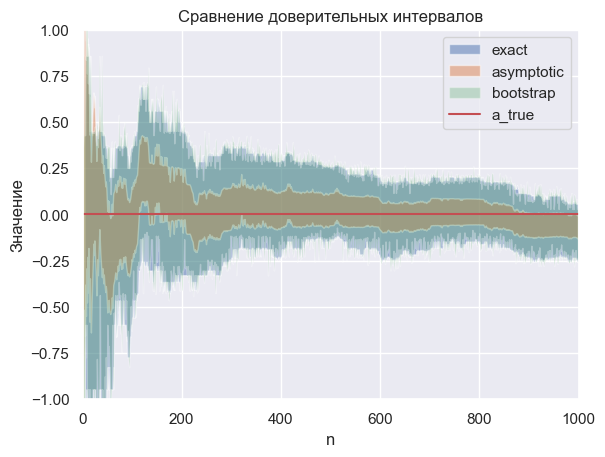

In [33]:
grid = np.arange(1, len(sample) + 1)

plt.fill_between(grid, exact_bounders.T[0], exact_bounders.T[1], alpha=0.5, label='exact')
plt.fill_between(grid, asymptotic_bounders.T[0], asymptotic_bounders.T[1], alpha=0.5, label='asymptotic')
plt.fill_between(grid, bootstrap_bounders.T[0], bootstrap_bounders.T[1], alpha=0.3, label='bootstrap')
plt.axhline(a_true, color='r', label='a_true')

plt.title('Cравнение доверительных интервалов')
plt.xlabel('n')
plt.ylabel('Значение')

plt.xlim((0, len(sample)))
plt.ylim([-1, 1])
plt.legend()
plt.show()

Почему то Бутстрепные ДИ совпали с Точным ДИ, но в целом можно увидеть их стремление к значению параметра

Моделированием по выборкам для фиксированного размера выборки (максимального из графика выше) проверьте, как часто параметр попадает в интервал.

In [34]:
sampsamp = sps.laplace.rvs(size = (N, n))
exact_samp = np.array([exact_ci(sampsamp[i]) for i in np.arange(0, N)])
asymptotic_samp = np.array([asymptotic_ci(sampsamp[i]) for i in np.arange(0, N)])
bootstrap_samp = np.array([bootstrap_ci(sampsamp[i]) for i in np.arange(0, N)])

In [35]:
def checker_ci(samp, param):
    size = samp.size
    left = samp.T[0]
    right = samp.T[1]
    sum_array = np.logical_and(left < param, param < right)
    return np.mean(sum_array)

In [36]:
print(checker_ci(exact_samp, a_true))
print(checker_ci(asymptotic_samp, a_true))
print(checker_ci(bootstrap_samp, a_true))


0.959
0.936
0.945


Сделайте вывод о точности, размере и простоте построения каждого из трёх интервалов.

**Вывод:**

Как видим, вероятность попадения в каждый из интервалов близка к 0.95 как мы и предпологали. Легче всего как мне кажется построить Бутсрепный интервал так как он не требует никакой дополнительной теории, уже всех получился ассимптотический интервал (имеет преимущество при больших выборках так как всетаки его границы стремятся к нужным при стремлении размера выборки к бесконечности), как не странно, но точнее всех вышел Точный ДИ так как использует более аккуратные и теоретические методы

## Задача 6. Бутстреп (10 баллов)

In [37]:
np.random.seed(42)

Выборка в ячейке ниже представляет собой измерение во времени количество часов, необходимых чтобы решить эту задачу для 10 случайных человек с курса.

In [38]:
17.68, 13.69, 11.22, 11.05, 13.86, 14.47, 14.50, 13.47, 10.04, 13.10

(17.68, 13.69, 11.22, 11.05, 13.86, 14.47, 14.5, 13.47, 10.04, 13.1)

Вычислите среднее время решения задачи

In [39]:
data = np.array([17.68, 13.69, 11.22, 11.05, 13.86, 14.47, 14.50, 13.47, 10.04, 13.10])
n = data.size
data_mean = np.mean(data)
print(np.round(data_mean, 2))


13.31


Предложите способ вычисления дисперсии полученной оценки (распределение, из которого пришли данные неизвестно):

Имея исходную выборку из 10 наблюдений, можно сформировать бутстрепную выборку путём случайной выборки с возвращением из исходных данных в таком же объёме. Будем вычислять средние для этих бутстрепных выборок $(X^{*}_1, \dots, X^{*}_B)$

Далее можно оценить дисперсию бутстрепных средних:
$\hat{\sigma}^{2*} = \frac{1}{B - 1}\sum_{b=1}^B(X^{*}_i - \overline{X^{*}})^2,$


Данная дисперсия будет приближать дисперсию оценки среднего (ошибку в оценке среднего).

In [40]:
B = 1000
n = 10

boot_sample = np.random.choice(data, size=(B, n), replace=True)
boot_means = np.mean(boot_sample, axis=1)
boot_var = np.var(boot_means, ddof=1) #делим на B-1 для смещения

print("Оценка дисперсии среднего:", boot_var)

Оценка дисперсии среднего: 0.42015497607607616


Предложите доверительный интервал уровня доверия 95% на истинное время выполнения задачи:

In [41]:
# 95% перцентильный бутстрепный доверительный интервал
ci_lower = np.quantile(boot_means, alpha/2)
ci_upper = np.quantile(boot_means, (1-alpha/2))
print(ci_lower, ci_upper)

13.73925 12.914499999999999


Какое число бутстрепных выборок Вы взяли? Почему?

ответ:
Обычно везде берут выборки размера 1000, я решил сделать также. При больших значениях выборки ДИ становится более стабильным, но слишком больших чисел нам не требуется для учебных целей 

Сравните доверительный интервал, который Вы построили методом бутстрепа с асимптотическим доверительным интервалом, построенным с использованием бутстрепной дисперсии. Какой вышел длиннее? Какому Вы бы больше доверились и почему?

In [42]:
sample_std = np.std(data)
std_err = sample_std / np.sqrt(n)
t_crit_1 = sps.t.ppf(1-alpha/2, df=n-1)
t_crit_2 = sps.t.ppf(alpha/2, df=n-1)

asymptotic = (data_mean - t_crit_1 * std_err, data_mean - t_crit_2 * std_err)
print("асимптотический доверительный интервал")
print(asymptotic)


асимптотический доверительный интервал
(np.float64(13.766354580582455), np.float64(12.849645419417541))


Сделайте вывод.

**Вывод**

Бутстрепный интервал может отличаться от асимптотического, учитывая реальное распределение данных,
в то время как асимптотический интервал основан на предположении о приближении распределения среднего к нормальному.


## Задача 7. Линейная регрессия (20 баллов)

Поговорим о задаче полиномиального приближения. Дан обобщённый многочлен степени 5, измеренный с нормальной независимой ошибкой.

$P(x) = a_0 + a_1x + a_2x^3 + a_3sin(x) + a_4ln(x)$.

Значения многочлена измерили с ошибкой в точках $x_i = $ 1, 2, ..., 20 и обозначили измерения как $y_i$.

Запишите линейную регрессионную модель, при помощи которой можно будет оценить параметры $a_i$.

Ответ:

Запишем следующую линейную регрессионную модель:

$$ Y = X \theta + \varepsilon $$


где:

$ (Y)_i = y_i $

$ (X)_i = (1, x_i, x_i^3, sin(x_i), ln(x_i)) i \in \{1, \dots, 20\} $

$\theta =  (a_0, a_1, a_2, a_3, a_4)^T $

$\varepsilon \sim N(0, \sigma^2I_{20}) $



На курсе математической статистики мы находили оценку параметра с помощью метода наименьших квадратов:

$$
\hat{\theta} = (X^T X)^{-1} X^T Y.
$$

Выберите какие-то ненулевые параметры $a_i$, проведите измерение (добавив нормальную ошибку) и вычислите оценку параметров. Использовать встроенную регрессионную модель ЗАПРЕЩЕНО, все формулы нужно написать самому.

In [43]:
theta = np.array([4.2, 2.5, 2, 1, 2])
sigma = 0.3
n = 20
k = theta.size

In [44]:
def X_builder(x):    
    return [1, x, x**3, np.sin(x), np.log(x)]

x_array = np.linspace(0.01, 3, 20)
X_matrix = np.array([X_builder(x) for x in x_array])
eps = sps.norm.rvs(loc = 0, scale = sigma, size = 20)

X = X_matrix @ theta
Y = X + eps
    

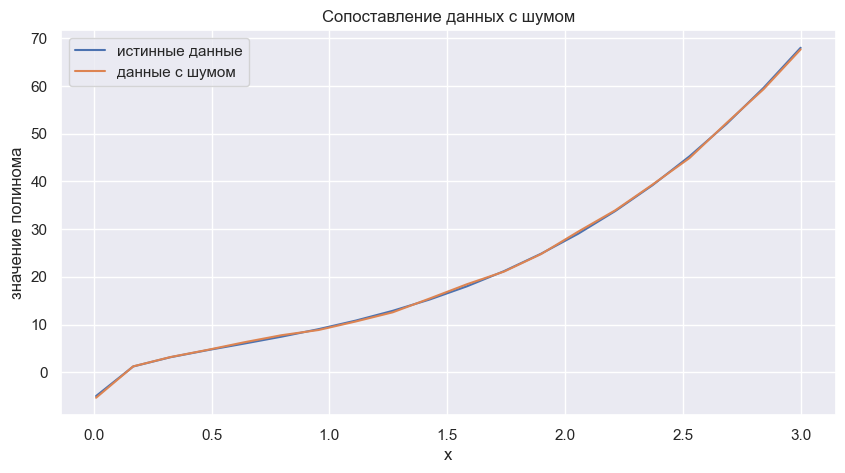

In [45]:
plt.figure(figsize = (10, 5))
plt.plot(x_array, X, label = "истинные данные")
plt.plot(x_array, Y, label = "данные с шумом")
plt.title("Сопоставление данных с шумом")
plt.xlabel("х")
plt.ylabel("значение полинома")
plt.legend()
plt.show()

In [46]:
theta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y
sigma_hat = np.sum((Y - X_matrix @ theta_hat)**2) / (n-k)
print(np.round(theta_hat, 2))
print(theta)

[ 4.68  3.85  1.82 -0.94  2.18]
[4.2 2.5 2.  1.  2. ]


Постройте доверительные интервалы для параметров $a_i$ и вычислите их:

Решение: Из семинаров известно про такую задачу:

Обозначим $a_{i,i}$, $i \in \{1, \dots, n\}$, диагональный элемент матрицы $(Z^T Z)^{-1}$, стоящий на $i$-ом месте. Тогда по теореме об ортогональном разложении случайная величина имеет распределение квантили $u_{1-\gamma}$ и $u_{1+\gamma}$:

$\frac{\hat{\theta} - \theta}{\sqrt{a_{i,i}} \, \hat{\sigma}} \sim T_{n-k}.$

Рассмотрим $\frac{1-\gamma}{2}$ и $\frac{1+\gamma}{2} $ - квантили этого распределения. Тогда:

$P_{\theta, \sigma^2}\left(u_{\frac{1-\gamma}{2}} < \frac{\hat{\theta} - \theta}{\sqrt{a_{i,i}} \, \hat{\sigma}} < u_{\frac{1+\gamma}{2}}\right) = \gamma,$

откуда получаем, что доверительный интервал уровня $\gamma$ для $\theta_i$ равен:

$\left[\hat{\theta} - \sqrt{a_{i,i}} \, \hat{\sigma} \, u_{\frac{1+\gamma}{2}}, \, \hat{\theta} - \sqrt{a_{i,i}} \, \hat{\sigma} \, u_{\frac{1-\gamma}{2}}\right].$



In [47]:
ZTZ = np.linalg.inv(X_matrix.T @ X_matrix)
gamma = 0.95
df = n - k

In [48]:
a_ii = np.array([ZTZ[i][i] for i in np.arange(0, 5)])

u1, u2 = sps.t.ppf((1 - gamma)/2, df=df), sps.t.ppf((1 + gamma)/2, df=df)

left = theta_hat - np.sqrt(a_ii * sigma_hat) * u2
right = theta_hat - np.sqrt(a_ii * sigma_hat) * u1

print("Доверительные интервалы для каждого параметра a_i")
print(np.round(left, 2))
print(np.round(right, 2))

Доверительные интервалы для каждого параметра a_i
[ 3.87  1.83  1.58 -3.8   1.94]
[5.5  5.87 2.06 1.93 2.43]


Границы интервалов и вправда близки к истинным значениям параметров

Проверьте гипотезу $a_3 = 0$ о бесполезности параметра 3 при помощи F-критерия (который нужно написать самому) на уровне значимости 0.05. Отвергается ли она?

Нужно проверить гипотезу $ H_0: a_3 = 0 $

$ \hat{t} = T\hat{\theta} $

$T = (0, 0, 1, 0, 0)$

$\tau = 0$

$B = T (Z^T Z)^{−1}T$


по Формуле F-критерий:

$$F_T = \frac{(\hat{t} - \tau)^T B^{-1} (\hat{t} - \tau)}{|| X - Z\hat \theta ||^2} \frac{n-k}{m} \sim F_{m, n-k}.$$

In [49]:
T = np.array([0, 0, 1, 0, 0])
m = T.shape[0]
alpha = 0.05
d1, d2 = m, n-k
tao = 0
B = T @ (np.linalg.inv(X_matrix.T @ X_matrix)) @ T #скаляр
t_hat = T @ theta_hat
quantile = sps.f.ppf(1 - alpha, d1, d2)


F_t = (t_hat - tao).T * (1/B) * (t_hat - tao) * (n - k) / np.sum((Y - X_matrix @ theta_hat)**2) /m

F_t > quantile

np.True_

Теперь положите $a_3 = 0$ и пересчитайте модель. Проверьте гипотезу из прошлого пункта снова. Отвергается ли она теперь?

In [50]:
theta = np.array([4.2, 2.5, 0, 1, 2])
X_matrix = np.array([X_builder(x) for x in x_array])
eps = sps.norm.rvs(loc = 0, scale = sigma, size = 20)

X = X_matrix @ theta
Y = X + eps

theta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y

B = T @ (np.linalg.inv(X_matrix.T @ X_matrix)) @ T #скаляр
t_hat = T @ theta_hat

F_t = (t_hat - tao).T * (1/B) * (t_hat - tao) * (n - k) / np.sum((Y - X_matrix @ theta_hat)**2) /m

F_t > quantile

np.False_

**Вывод:**

Можно строить Доверительные Интервалы с помощью распределения Стьюдента, используя оценку дисперсии $\hat{\sigma}^2$ и ковариационную матрицу $(X^T X)^{-1}$.
F-критерий - хорошо справляется с задачей о проверке линейной гипотезы, хоть и иногда не может зафиксировать ложную гипотезу. Возможно из за маленького значения $a_3$ гипотеза не отвергалась так же как и при $a_3 = 0$, но это уже особенности модели, если бы мы проверяли гипотезу на большой выборке $(x_i > 5)$ или типа того, параметр $a_3$ контролировался бы намного строже

## Задача 8. Проверка гипотез. (10 баллов)

Сформулируйте теорему Колмогорова (усиленную версию теоремы Гливенко-Кантелли, но о сходимости величины $\sqrt{N}D_N$:

Ответ:

пусть у нас есть гипотеза о виде функции распределения $ H_0: F(x) = F_{0}(x) $.

$F^{*}_{n}(x)$ - эмперическая функция распределения.

Обозначим $ D_N = sup(|F^{*}_{n}(x) - F_{0}(x)|) $.

#### Теорема (Колмогорова):
В предположении верности нулевой гипотезы имеет место равенство:

$lim_{n \rightarrow \infty} P(\sqrt{n} D_n \leq t) = K(t)$

где $K(t)$ - функция распределения Колмагорова


Критерий Колмагорова: $ {\sqrt{n} D_n > K_{1-\alpha}} $ где $K_{1-\alpha} - (1-\alpha) $ квантиль

Промоделируйте поведение статистики $\sqrt{N}D_N$ и постройте KDE-приближение распределения Колмогорова:

Построим $D_n$ на основе Стандартного нормального распределения

In [51]:
dist = sps.norm.cdf
N = 1000

def F_emp(X, t):
    size = X.size
    X_samp = X.copy()
    X_samp = np.sort(X_samp)
    index = np.searchsorted(X_samp, t, side="right")
    return index / size

def nD_n(F, X):
    grid = np.linspace(0, 5, 1000)
    return np.sqrt(X.size) * np.max(np.abs(F(grid) - F_emp(X, grid)))

sample = sps.norm.rvs(size = N)

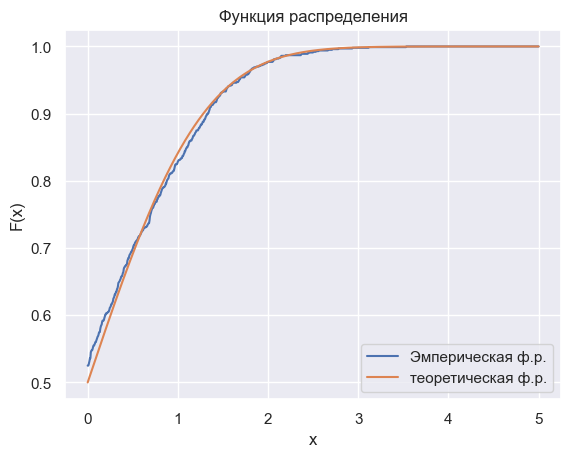

In [52]:
grid = np.linspace(0, 5, 1000)
plt.plot(grid, F_emp(sample, grid), label = "Эмперическая ф.р.")
plt.plot(grid, dist(grid), label = "теоретическая ф.р.")
plt.ylabel("F(x)")
plt.xlabel("x")
plt.title("Функция распределения")
plt.legend()
plt.show()

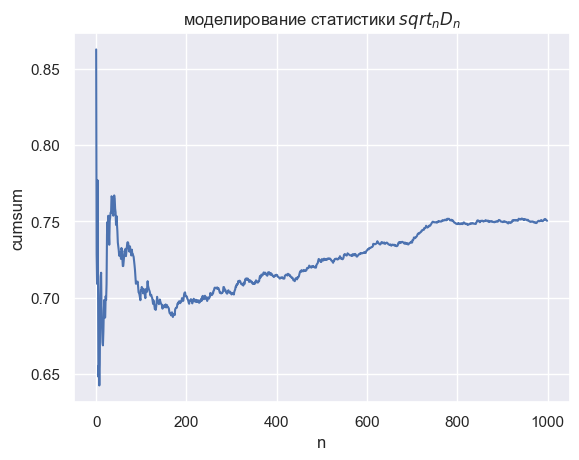

In [53]:
X = sps.norm.rvs(size = (N,N))

D_n_array = [nD_n(dist, row) for row in X]
model = np.cumsum(D_n_array) / np.arange(1, N + 1)
plt.plot(np.arange(0, N), model)
plt.ylabel("cumsum")
plt.xlabel("n")
plt.title("моделирование статистики $sqrt_n D_n$")
plt.show()


In [97]:
N = 1000

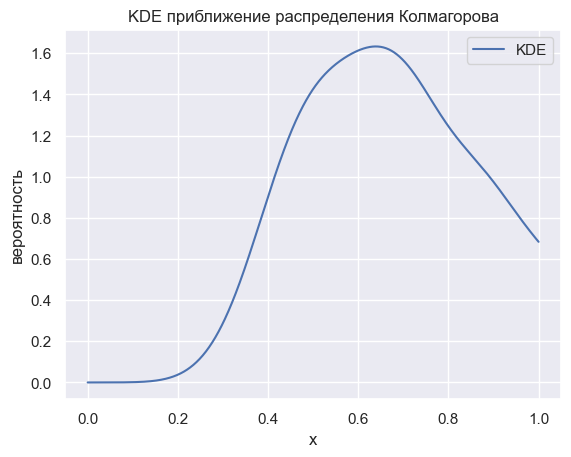

In [98]:
X = sps.norm.rvs(size = (N, 1000))
nDn_arr = np.array([nD_n(dist, X[i]) for i in np.arange(0,N)])
kde = sps.gaussian_kde(nDn_arr)
grid = np.linspace(0, 1, 1000)

plt.plot(grid, kde(grid), label="KDE")
plt.title("KDE приближение распределения Колмагорова")
plt.xlabel("x")
plt.ylabel("вероятность")
plt.legend()
plt.grid(True)
plt.show()

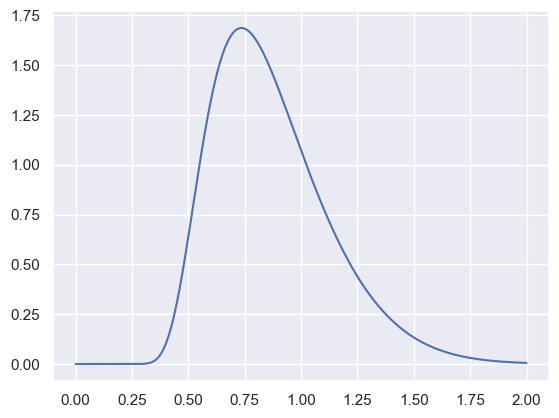

In [99]:
grid = np.linspace(0, 2, 1000)
plt.plot(grid, sps.kstwobign.pdf(grid))

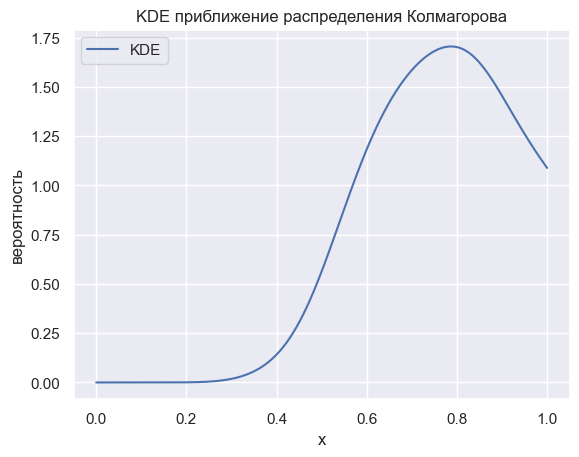

In [102]:
X = sps.kstwobign.rvs(size = 1000)
# nDn_arr = np.array([nD_n(dist, X[i]) for i in np.arange(0,N)])
kde = sps.gaussian_kde(X)
grid = np.linspace(0, 1, 1000)

plt.plot(grid, kde(grid), label="KDE")
plt.title("KDE приближение распределения Колмагорова")
plt.xlabel("x")
plt.ylabel("вероятность")
plt.legend()
plt.grid(True)
plt.show()

Реализуйте критерий согласия Колмогорова и проверьте его уровень значимости для распределений $U[0, 1]$, $exp(1)$ и $N(0, 1)$:

Реализуем критерий уровня значимости $\alpha$ и проверим что они совпадают

In [56]:
def F_emp_multidim(X, t):
    X_samp = X.copy()
    X_samp = np.sort(X_samp, axis=1)
    index = np.array([np.searchsorted(row, t, side="right") for row in X_samp])
    return index / size

def D_n_for_point_multidim(F, X, t):
    return np.abs(F(t) - F_emp_multidim(X, t))

N = 1000
size = 100
alpha = 0.05
kolm_quant = sps.kstwobign.ppf(1 - alpha)


In [57]:
def check_result(dest):
    X_samples = dest.rvs(loc=0, scale=1, size=(N, size))
    grid = np.linspace(-2, 2, 1000)
    norm_cdf = dest.cdf

    my_D_results = D_n_for_point_multidim(norm_cdf, X_samples, grid)
    my_nDn = np.sqrt(size) * my_D_results.max(axis=1)
    answers = my_nDn[my_nDn > kolm_quant]
    print(answers.size / N)

$U[0, 1]$:

In [58]:
check_result(sps.uniform)

0.047


$exp(1)$:

In [59]:
check_result(sps.expon)

0.033


$N(0, 1)$:

In [60]:
check_result(sps.norm)

0.041


при верности гипотезы, критерии отвергает ее с примерно 0.05 вероятностью

Посчитайте мощность критерия Колмогорова для разных пар распределений из предыдущего пункта.

In [84]:
def check_wrong_results(dest1, dest2):
    # X_samples = dest1.rvs(loc=0, scale=1, size=(N, size))
    # grid = np.linspace(-2, 2, 1000)
    # # norm_cdf = dest2.cdf

    # my_D_results = D_n_for_point_multidim(dest2.cdf, X_samples, grid)
    # my_nDn = np.sqrt(size) * my_D_results.max(axis=1)
    # answers = my_nDn[my_nDn > kolm_quant]
    # print(answers.size / size)
    X = dest1.rvs(size = (N, 1000))
    nDn_arr = np.array([nD_n(dest2.cdf, X[i]) for i in np.arange(0,N)])
    sumarr = np.mean([nDn_arr > kolm_quant])
    print(sumarr)

$U[0, 1]$, $exp(1)$:

In [85]:
check_wrong_results(sps.uniform, sps.expon)

1.0


$U[0, 1]$, $N(0, 1)$:

In [86]:
check_wrong_results(sps.uniform, sps.norm)

1.0


$exp(1)$, $N(0, 1)$:

In [87]:
check_wrong_results(sps.expon, sps.norm)

1.0


из исследования видно что мощьность критерия = 0.1

Сформулируйте теорему Карла Пирсона о критерии хи-квадрат для дискретных распределений:

Пусть $ X_1 , \dots, X_n $ - выборка из схемы Бернулли с $m \geq 2$ исходами, т.е. $a_1, \dots, a_m$ - исходы $ P(X_i = a_j) = p_j $ для $ j = 1, \dots, n $. Построим критерий для проверки гипотезы $H_0 : p_j = p^0_j$



$ \hat \chi  = \sum^{m}_{i=1} \frac{\mu_j - np^0_j}{np^0_j} $

#### Теорема Карла Пирсона:
В предположении верности гипотезы, имеет место сходимость 
$$ \hat \chi \xrightarrow{d} \chi^2_{m-1} $$

на чьей основе строится критерий хи-квадрат: $ {\hat \chi > u_{1-\alpha}} $ где $ u_{1-\alpha} - (1-\alpha) $ кваниль $ \chi^2_{m-1} $


Численно проверьте верность теоремы, посчитав выборочные квантили статистики Пирсона и хи-квадрат с нужной степенью свободы:

In [66]:
n = 10000
k = 5
df = k - 1

Квантили статистики: [ 1.1  3.4  7.8  9.5 13.5]
Квантили хи-квадрат: [ 1.06362322  3.35669398  7.77944034  9.48772904 13.27670414]


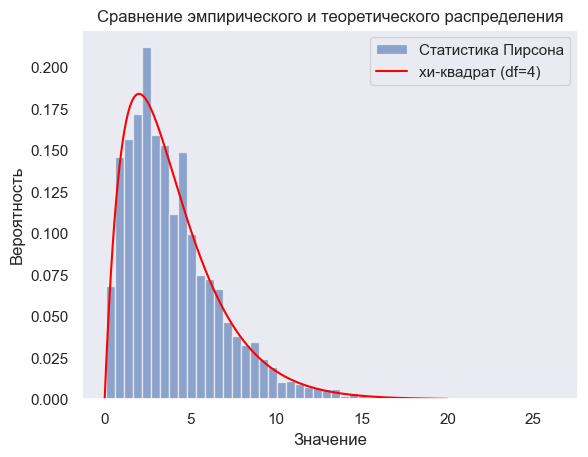

In [67]:
expected = np.ones(k) / k
pearson_statistics = []
for _ in range(n):
    sample = sps.multinomial.rvs(100, expected)
    chi2_stat = np.sum((sample - 100 * expected)**2 / (100 * expected))
    pearson_statistics.append(chi2_stat)

quantiles = [0.1, 0.5, 0.9, 0.95, 0.99]
sample_quantiles = np.quantile(pearson_statistics, quantiles)
theoretical_quantiles = sps.chi2.ppf(quantiles, df = df)

print("Квантили статистики:", sample_quantiles)
print("Квантили хи-квадрат:", theoretical_quantiles)

x = np.linspace(0, 20, 1000)
plt.hist(pearson_statistics, bins=50, density=True, alpha=0.6, label="Cтатистика Пирсона")
plt.plot(x, sps.chi2.pdf(x, df), label=f"хи-квадрат (df={df})", color="red")
plt.title("Сравнение эмпирического и теоретического распределения")
plt.xlabel("Значение")
plt.ylabel("Вероятность")
plt.legend()
plt.grid()
plt.show()


Проверьте уровень значимости критерия для трёх выборок из категориального распределения с хотя бы 3 исходами:

In [68]:
def check_result_chi2(k, alpha=0.05):
    N = 1000
    size = 1000
    df = k - 1

    chi2_quant = sps.chi2.ppf(1 - alpha, df)

    expected = np.ones(k) / k
    X_samples = sps.multinomial.rvs(n = N, p = expected, size=size)

    chi2_statistics = np.sum((X_samples - N * expected) ** 2 / (N * expected), axis = 1)

    answers = chi2_statistics[chi2_statistics > chi2_quant]
    print(answers.size / size)    

In [69]:
print("для категории с 3 исходами")
check_result_chi2(3)
print("для категории с 5 исходами")
check_result_chi2(5)
print("для категории с 10 исходами")
check_result_chi2(10)


для категории с 3 исходами
0.049
для категории с 5 исходами
0.049
для категории с 10 исходами
0.051


Значения тоже варируются около 0.05

Посчитайте мощность критерия для распределений с 3, 5 и 10 исходами:

In [96]:
def check_wrong_result_chi2(k1, k2, alpha=0.05):
    N = 100
    size = 100
    df = k2 - 1

    chi2_quant = sps.chi2.ppf(1 - alpha, df)

    expected = np.ones(k1) / k1
    X_samples = sps.multinomial.rvs(n = N, p = expected, size=size)

    chi2_statistics = np.sum((X_samples - N * expected) ** 2 / (N * expected), axis = 1)
    # answers = chi2_statistics[chi2_statistics > chi2_quant]
    answers = np.array([chi2_statistics > chi2_quant])
    print(np.mean(answers))

In [95]:
print("для категории с 3, 5 исходами")
check_wrong_result_chi2(3, 5)
print("для категории с 5, 10 исходами")
check_wrong_result_chi2(5, 10)
print("для категории с 3, 10 исходами")
check_wrong_result_chi2(3, 10)


для категории с 3, 5 исходами
9.487729036781154
[2.3660e+00 1.4420e+00 3.9140e+00 1.4480e+00 8.1800e-01 1.5500e+00
 9.6200e-01 8.5400e-01 7.9400e-01 3.3980e+00 2.0600e-01 2.6600e-01
 3.5060e+00 1.2620e+00 3.8780e+00 1.6460e+00 4.9400e-01 6.0800e-01
 9.9800e-01 2.5220e+00 8.0600e-01 1.1180e+00 1.0160e+00 3.8600e-01
 1.1780e+00 3.9200e-01 2.9180e+00 5.5400e-01 1.8200e-01 2.6000e-02
 4.7420e+00 4.1600e-01 1.3580e+00 2.5220e+00 5.0540e+00 2.8580e+00
 5.1200e-01 2.3660e+00 8.0600e-01 4.8020e+00 1.1780e+00 3.6140e+00
 7.3520e+00 8.2220e+00 2.0600e-01 3.6260e+00 2.0480e+00 6.2600e-01
 5.7800e-01 9.3800e-01 9.8000e-02 6.0200e-01 2.4080e+00 4.9460e+00
 1.8200e-01 7.2740e+00 6.0200e-01 1.2500e+00 1.4540e+00 3.7220e+00
 2.4500e+00 4.8200e-01 5.6600e-01 2.9540e+00 3.2720e+00 2.2160e+00
 1.1780e+00 9.6800e-01 7.2800e-01 9.9200e-01 9.8000e-02 7.1120e+00
 1.4540e+00 3.2600e-01 2.6600e-01 1.0220e+00 1.0820e+00 9.3800e-01
 2.9060e+00 8.5940e+00 2.0540e+00 1.9400e-01 2.5940e+00 8.0600e-01
 1.4000e-02 4.

Опишите возможность применения критерия Пирсона для проверки гипотез с непрерывными распределениями:

Можно разбить пространсво значении выборки на конечное разбиение, присваивая данным значение интервала в который они попали, тем самым приводя данные к дискретному распределению

Сравните мощности критерия Пирсона и критерия Колмогорова на парах распределений $U[0, 1]$, $exp(1)$ и $N(0, 1)$

In [72]:
def check_result_chi2_continuous(dest, bins, alpha=0.05):
    N = 1000
    size = 100
    df = len(bins) - 1

    chi2_quant = sps.chi2.ppf(1 - alpha, df)
    X_samples = dest.rvs(size=(N, size))
    observed_counts = np.array([
        np.histogram(sample, bins=bins)[0] for sample in X_samples
    ])
    bin_probs = np.diff(dest.cdf(bins))
    expected_counts = size * bin_probs

    chi2_statistics = np.sum(
        (observed_counts - expected_counts) ** 2 / expected_counts, axis=1
    )
    answers = chi2_statistics[chi2_statistics > chi2_quant]
    print(answers.size / N)


 $N(0, 1)$

In [73]:
bins = sps.norm.ppf(np.linspace(0.1, 0.9, 10))
check_result_chi2_continuous(sps.norm, bins)


0.031


In [74]:
bins = sps.norm.ppf(np.linspace(0.1, 0.9, 10))
check_result(sps.norm)


0.045


$exp(1)$

In [75]:
bins = sps.expon.ppf(np.linspace(0.1, 0.9, 10))
check_result_chi2_continuous(sps.expon, bins)
check_result(sps.expon)


0.03
0.052


$U[0, 1]$

In [76]:
bins = sps.uniform.ppf(np.linspace(0.1, 0.9, 10))
check_result_chi2_continuous(sps.uniform, bins)
check_result(sps.uniform)


0.04
0.042


Сделайте выводы:

Из проведенных выше экспериментов, я понял что оба критерия очень полезны для проверки разных гипотез, критерий Колмагорова будет более полезен при абсолютно непрерывных распределениях, но к сожелению не применим к дискретным выборкам, но для этого есть критерий Хи-квадрат. хотелось бы заметить что на непрерывных распределениях - критерий Колмагорова ведет себя более стабильно чем хи-квадрат (скорее всего потому что при преобразовании непрерывную выборку в дискретую теряется слишком много информации) но хи квадрат отвергает выборку реже чем следует (поидее это хорошо, но я считаю что такое не контролируемое поведение будет считаться скорее всего минусом)

Желаем удачи!